In [165]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Baca excel
df = pd.read_excel("Kuesioner Ngopi.xlsx")

(df.head(10))

Saving Kuesioner Ngopi.xlsx to Kuesioner Ngopi.xlsx


,Timestamp,Email Address,Apakah anda bersedia mengisi pertanyaan-pertanyaan berikut ini?,Nama,NPM,Fakultas,Program Studi,Nomer Whatsapp,Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?,Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa,Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?,Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?,Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?,Bagaimana cara kamu biasanya mendapatkan kopi?,Waktu paling sering kamu minum kopi saat jadi mahasiswa?,Efek utama yang kamu rasakan setelah minum kopi saat belajar?,Di mana tempat favorit kamu minum kopi sambil belajar?,"Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?"
0,2025-09-11 14:20:35.956000,24083010030@student.upnjatim.ac.id,Ya,R. Syailindra Alfarraiel,24083010030,Fakultas Ilmu Komputer,Sains Data,087846270459,1,10000,3,3,0.6,Beli kemasan siap minum,Sebelum berangkat kuliah,Tahan ngantuk,Cafe/warkop,Sekedar kebiasaan
1,2025-09-11 14:21:21.412000,24041010274@student.upnjatim.ac.id,Ya,Farrel,24041010274,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,082228857899,2,0,2 Jam,0,0,Bikin sendiri di rumah/kos,Setelah kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan
2,2025-09-11 14:28:59.663000,24041010218@student.upnjatim.ac.id,Ya,Farivatus Amalia,24041010218,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,+6287785705523,1,100000,4 jam,3-5 tergantung,100% 😍😍,Beli di cafe/warung kopi,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Sekedar kebiasaan
3,2025-09-11 14:31:32.376000,23081010157@student.upnjatim.ac.id,Ya,Azzahra,23081010157,Fakultas Ilmu Komputer,Informatika,081335485748,1,30000,3,1,0.5,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas
4,2025-09-11 14:47:38.676000,24083010019@student.upnjatim.ac.id,Ya,Hizkia Samhan Rezayoshi,24083010019,Fakultas Ilmu Komputer,Sains Data,081399642665,1,15000,4,1,0.4,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas
5,2025-09-11 14:50:53.185000,24041010038@student.upnjatim.ac.id,Ya,Difa,-,Fakultas Ilmu Sosial dan Ilmu Politik,Administrasi Publik,-,1,8000-20000,3 jam,1-2,0.7,Beli di cafe/warung kopi,Saat mengerjakan tugas,Tahan ngantuk,Rumah/kos,Kebutuhan wajib menemani mengerjakan tugas
6,2025-09-11 14:52:26.246000,24041010321@student.upnjatim.ac.id,Ya,Kezya,24041010321,Fakultas Ilmu Sosial dan Ilmu Politik,adpub,-,1,80-100 ribu,kopi tidak terlalu berpengaruh bagi saya,tidak pernah nongkrong,0.3,Beli di cafe/warung kopi,Saat mengerjakan tugas,Biasa aja,Rumah/kos,Sekedar kebiasaan
7,2025-09-11 14:53:57.718000,24083010041@student.upnjatim.ac.id,Ya,Sulaiman Abhinaya Praditya,24083010041,Fakultas Ilmu Komputer,Sains Data,082228329816,0,0,1 jam,1,0.4,Beli di cafe/warung kopi,Saat kuliah,Biasa aja,Cafe/warkop,Sekedar kebiasaan
8,2025-09-11 15:00:41.035000,24083010094@student.upnjatim.ac.id,Ya,Puri Khairunisa Rahma,24083010094,Fakultas Ilmu Komputer,Sains Data,081332213220,1,10000,3,0,60 %,Bikin sendiri di rumah/kos,Sebelum berangkat kuliah,Biasa aja,Rumah/kos,Sekedar kebiasaan
9,2025-09-11 15:11:09.260000,24013010073@student.upnjatim.ac.id,Ya,Denia Nurhalizah,24013010073,Fakultas Ekonomi dan Bisnis,Akuntansi,082264405139,3,45 ribu,10jam,3,0.85,Bikin sendiri di rumah/kos,Saat mengerjakan tugas,Lebih semangat,Cafe/warkop,Kebutuhan wajib menemani mengerjakan tugas


In [166]:
import numpy as np
import re
df = pd.read_excel("Kuesioner Ngopi.xlsx", header=0)

In [167]:
print(df.columns.tolist())

['Timestamp', 'Email Address', 'Apakah anda bersedia mengisi pertanyaan-pertanyaan berikut ini?', 'Nama', 'NPM', 'Fakultas', 'Program Studi', 'Nomer Whatsapp', 'Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?', 'Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa', 'Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?', 'Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?', 'Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?', 'Bagaimana cara kamu biasanya mendapatkan kopi? ', 'Waktu paling sering kamu minum kopi saat jadi mahasiswa? ', 'Efek utama yang kamu rasakan setelah minum kopi saat belajar? ', 'Di mana tempat favorit kamu minum kopi sambil belajar? ', 'Menurutmu, ngopi sebagai mahasiswa itu lebih ke arah apa?']


In [169]:
# Jumlah gelas kopi per hari
def clean_cups(value):
    if pd.isna(value): return np.nan
    nums = re.findall(r'\d+', str(value))
    return float(nums[0]) if nums else np.nan

Responden menuliskan jawaban dengan format berbeda, misalnya “2 gelas”, “±3”, atau angka murni. Transformasi dilakukan dengan cara mengekstrak angka dari jawaban tersebut dan mengabaikan teks tambahan. Hasil akhirnya berupa angka jumlah gelas kopi yang dikonsumsi per hari.

In [170]:
# Pengeluaran per minggu (rupiah)
def clean_spending(value):
    if pd.isna(value): return np.nan
    text = str(value).lower()
    nums = re.findall(r'\d+', text)
    if not nums: return np.nan
    val = (int(nums[0]) + int(nums[-1]))/2 if len(nums) >= 2 else int(nums[0])
    if "ribu" in text or "rb" in text:
        val *= 1000
    return val

Beberapa responden menulis pengeluaran dengan simbol atau teks tambahan, seperti “Rp 30.000”, “±50k”, atau “10000”. Transformasi dilakukan dengan menghapus simbol (Rp, ±, k) serta tanda pemisah ribuan, kemudian mengubahnya menjadi angka. Hasil akhirnya berupa pengeluaran mingguan dalam satuan rupiah.

In [171]:
# Jam belajar setelah minum kopi
def clean_study_hours(value):
    if pd.isna(value): return np.nan
    nums = re.findall(r'\d+', str(value))
    return float(nums[0]) if nums else np.nan

Data awal berisi jawaban seperti “3 jam”, “±2”, atau rentang “2–4 jam”. Transformasi dilakukan dengan mengambil angka dari jawaban tersebut. Jika jawaban berupa rentang, maka nilai yang dipakai adalah rata-rata. Hasil akhirnya berupa angka jumlah jam belajar per hari.

In [172]:
# Frekuensi nongkrong di kafe
def clean_cafe_freq(value):
    if pd.isna(value): return np.nan
    text = str(value).lower()
    if any(w in text for w in ["tidak", "ga", "gak", "nggak"]):
        return 0
    nums = re.findall(r'\d+', text)
    if not nums: return np.nan
    return (float(nums[0]) + float(nums[-1]))/2 if len(nums) >= 2 else float(nums[0])

Responden menuliskan jawaban dengan variasi seperti “3 kali”, “1–2 tergantung”, “2x/minggu”, atau “4 kali sebulan”. Transformasi dilakukan dengan cara mengekstrak angka, menghitung rata-rata jika berupa rentang, serta mengonversi satuan bulanan menjadi mingguan (dibagi 4). Hasil akhirnya berupa angka frekuensi kunjungan ke cafe dalam seminggu.

In [173]:
# Persentase peningkatan fokus
def clean_focus(value):
    if pd.isna(value): return np.nan
    text = str(value).lower()
    nums = re.findall(r'\d+\.?\d*', text)
    if not nums: return np.nan
    val = float(nums[0])
    if "%" in text:
        return val
    if 0 < val <= 1:   # kasus "0.6"
        return val * 100
    return val

Jawaban responden ditulis dengan bentuk seperti “60%”, “100”, atau “±40%”. Transformasi dilakukan dengan menghapus simbol persen maupun teks tambahan, lalu mengubah hasilnya menjadi angka murni. Hasil akhirnya berupa tingkat fokus dalam skala 0–100 persen.

In [174]:
df["kopi_per_hari"] = df["Berapa gelas kopi yang biasanya kamu konsumsi dalam sehari saat kuliah?"].apply(clean_cups)

df["pengeluaran_kopi_mingguan"] = df["Berapa rupiah rata-rata yang kamu habiskan untuk membeli kopi dalam seminggu sebagai mahasiswa"].apply(clean_spending)

df["jam_belajar_setelah_ngopi"] = df["Berapa jam biasanya kamu bisa bertahan belajar setelah minum kopi?"].apply(clean_study_hours)

df["ke_cafe_per_minggu"] = df["Berapa kali dalam seminggu kamu nongkrong atau belajar di kafe?"].apply(clean_cafe_freq)

df["fokus_persen"] = df["Berapa persen menurutmu kopi membantu meningkatkan fokus belajar (0–100%)?"].apply(clean_focus)

In [175]:
print(df[["kopi_per_hari","pengeluaran_kopi_mingguan","jam_belajar_setelah_ngopi","ke_cafe_per_minggu","fokus_persen"]].head(10))

   kopi_per_hari  pengeluaran_kopi_mingguan  jam_belajar_setelah_ngopi  \
0            1.0                    10000.0                        3.0   
1            2.0                        0.0                        2.0   
2            1.0                   100000.0                        4.0   
3            1.0                    30000.0                        3.0   
4            1.0                    15000.0                        4.0   
5            1.0                    14000.0                        3.0   
6            1.0                    90000.0                        NaN   
7            0.0                        0.0                        1.0   
8            1.0                    10000.0                        3.0   
9            3.0                    45000.0                       10.0   

   ke_cafe_per_minggu  fokus_persen  
0                 3.0          60.0  
1                 0.0           0.0  
2                 0.0         100.0  
3                 1.0          50

Dengan transformasi ini, seluruh data numerik yang sebelumnya bercampur dengan teks dan simbol sudah konsisten berbentuk angka. Dataset pun siap digunakan untuk analisis statistik maupun pemodelan.

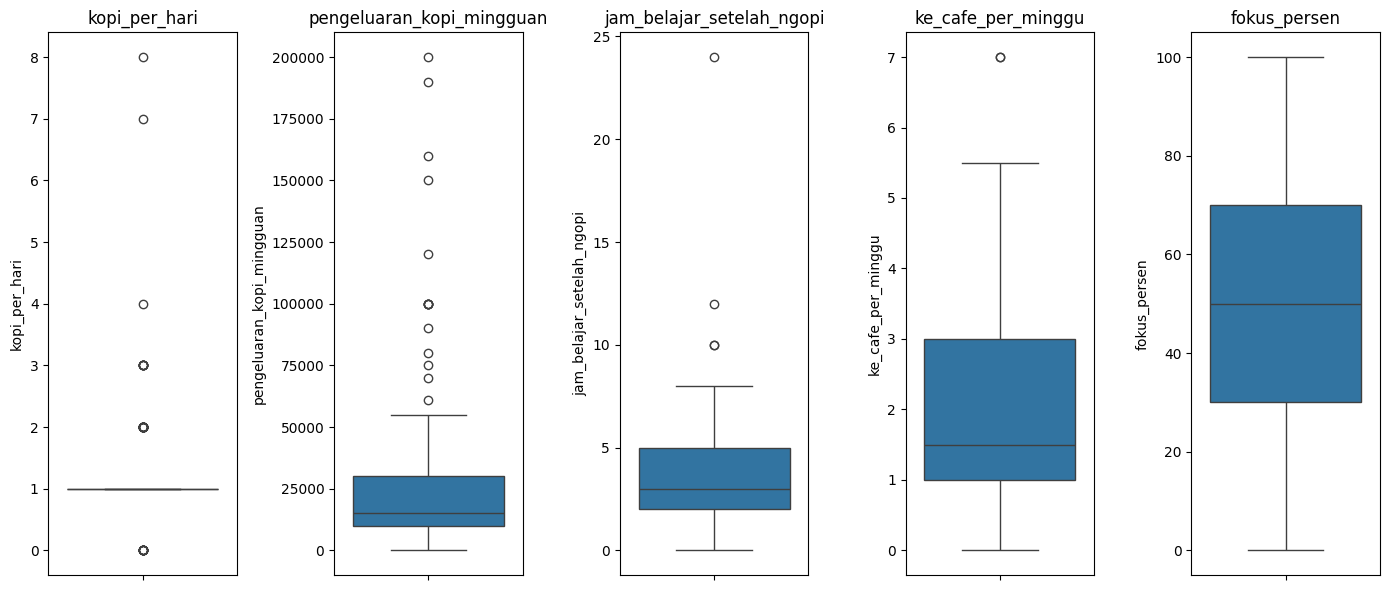

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# pilih hanya kolom numerikal
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# buat boxplot untuk setiap kolom numerikal
plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)  # bikin subplot sejajar
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [177]:
import pandas as pd

def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers

summary = pd.DataFrame({
    "missing_values": df[num_cols].isna().sum(),
    "outlier_count": [detect_outliers(df[col]) for col in num_cols],
    "total_rows": len(df)
})

summary["outlier_percentage"] = (summary["outlier_count"] / summary["total_rows"]) * 100
summary

,missing_values,outlier_count,total_rows,outlier_percentage
kopi_per_hari,8,47,165,28.484848
pengeluaran_kopi_mingguan,0,15,165,9.090909
jam_belajar_setelah_ngopi,17,4,165,2.424242
ke_cafe_per_minggu,5,2,165,1.212121
fokus_persen,1,0,165,0.000000


In [178]:
bounds = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)

    # lakukan capping
    df[col] = df[col].clip(lower, upper)

    # isi missing value dengan median
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-593968727.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-593968727.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Pada tahap ini dilakukan penanganan outlier dan missing values pada variabel numerik. Outlier ditentukan menggunakan metode Interquartile Range (IQR), yaitu dengan menghitung Q1, Q3, serta batas bawah dan batas atas (Q1 – 1.5 × IQR dan Q3 + 1.5 × IQR). Nilai yang berada di luar rentang tersebut tidak dihapus, melainkan dilakukan capping sehingga nilai ekstrem ditarik ke batas terdekat. Dengan cara ini, data tetap terjaga tanpa menghilangkan responden. Selanjutnya, untuk menangani missing values, setiap nilai kosong pada kolom numerik diisi menggunakan nilai median dari kolom tersebut agar distribusi data tidak terdistorsi oleh nilai yang terlalu ekstrem.

In [179]:
def detect_outliers_fixed(series, lower, upper):
    return ((series < lower) | (series > upper)).sum()

Untuk memeriksa kembali apakah outlier masih ada setelah dilakukan capping, dibuat fungsi detect_outliers_fixed.

In [180]:
outlier_summary = pd.DataFrame({
    "outlier_count": [
        detect_outliers_fixed(df[col], *bounds[col]) for col in num_cols
    ]
}, index=num_cols)

print("Jumlah outlier setelah penanganan:")
print(outlier_summary)

Jumlah outlier setelah penanganan:
                           outlier_count
kopi_per_hari                          0
pengeluaran_kopi_mingguan              0
jam_belajar_setelah_ngopi              0
ke_cafe_per_minggu                     0
fokus_persen                           0


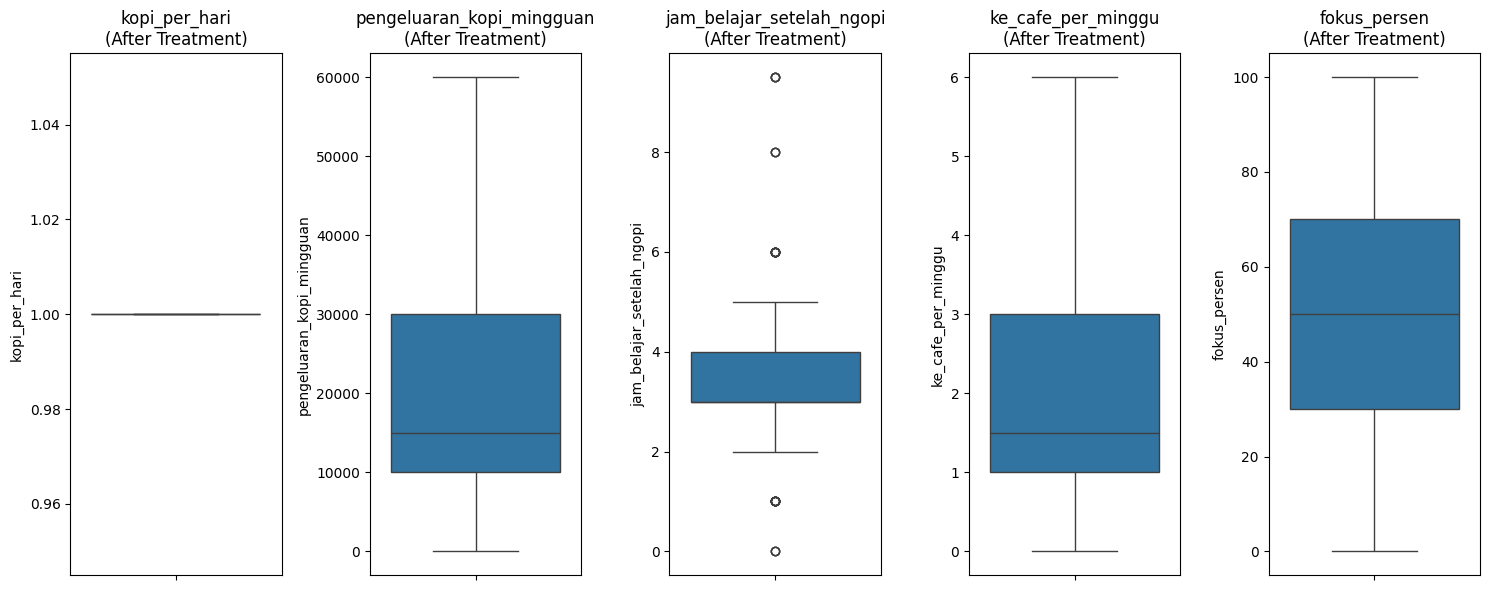

In [181]:
plt.figure(figsize=(15,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f"{col}\n(After Treatment)")
plt.tight_layout()
plt.show()

Meskipun hasil perhitungan menunjukkan jumlah outlier sudah nol, visualisasi boxplot masih menampilkan beberapa titik di luar whisker. Hal ini bukan berarti outlier masih ada, melainkan disebabkan oleh perbedaan aturan dalam penentuan batas antara metode deteksi dan tampilan boxplot. Pada saat proses penanganan outlier dengan metode capping, semua nilai yang berada di luar batas bawah dan atas (berdasarkan IQR) sudah dipotong (clip) agar masuk ke dalam rentang wajar. Namun, library visualisasi seperti matplotlib atau seaborn tetap menggambar whisker dan titik berdasarkan perhitungan statistik standar (Q1 – 1.5IQR dan Q3 + 1.5IQR) dari data terbaru. Akibatnya, nilai yang secara teknis sudah "di dalam rentang" tetap dapat digambarkan sebagai titik karena posisinya relatif jauh dari mayoritas data.

Dengan demikian, tidak ada lagi outlier menurut metode deteksi, dan perbedaan tampilan di boxplot lebih disebabkan oleh representasi visual, bukan karena masih adanya data outlier.

In [182]:
# Kategorisasi kopi per hari
def kategori_kopi(gelas):
    if pd.isna(gelas):
        return np.nan
    if gelas <= 1:
        return "Jarang"
    elif 2 <= gelas <= 3:
        return "Normal"
    else:
        return "Sering"

df["kategori_kopi"] = df["kopi_per_hari"].apply(kategori_kopi)

# Kategorisasi pengeluaran mingguan
def kategori_pengeluaran(rupiah):
    if pd.isna(rupiah):
        return np.nan
    if rupiah <= 20000:
        return "Hemat"
    elif 21000 <= rupiah <= 50000:
        return "Normal"
    else:
        return "Tinggi"

df["kategori_pengeluaran"] = df["pengeluaran_kopi_mingguan"].apply(kategori_pengeluaran)

# Cek hasil
print(df[["kopi_per_hari", "kategori_kopi",
          "pengeluaran_kopi_mingguan", "kategori_pengeluaran"]].head())

   kopi_per_hari kategori_kopi  pengeluaran_kopi_mingguan kategori_pengeluaran
0            1.0        Jarang                    10000.0                Hemat
1            1.0        Jarang                        0.0                Hemat
2            1.0        Jarang                    60000.0               Tinggi
3            1.0        Jarang                    30000.0               Normal
4            1.0        Jarang                    15000.0                Hemat


/tmp/ipython-input-3856023213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="kategori_kopi", order=["Jarang","Normal","Sering"], palette="Blues")


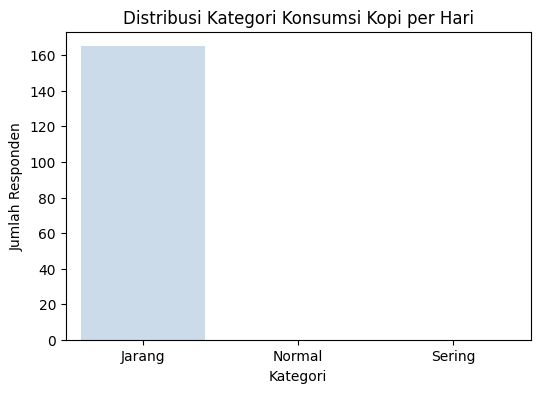

/tmp/ipython-input-3856023213.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="kategori_pengeluaran", order=["Hemat","Normal","Tinggi"], palette="Greens")


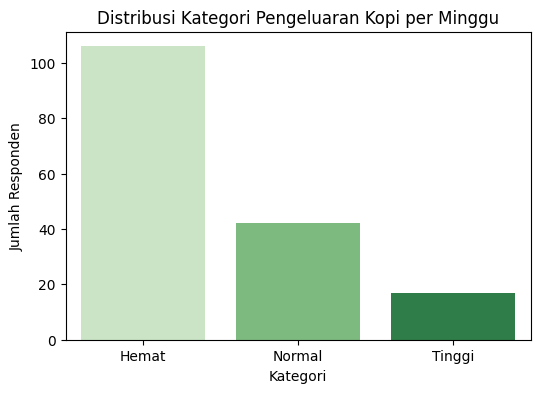

In [183]:
# Visualisasi kategori kopi per hari
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="kategori_kopi", order=["Jarang","Normal","Sering"], palette="Blues")
plt.title("Distribusi Kategori Konsumsi Kopi per Hari")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Responden")
plt.show()

# Visualisasi kategori pengeluaran kopi mingguan
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="kategori_pengeluaran", order=["Hemat","Normal","Tinggi"], palette="Greens")
plt.title("Distribusi Kategori Pengeluaran Kopi per Minggu")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Responden")
plt.show()